In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf, acf

In [5]:
train_1 = pd.read_csv('../Data/train_1.csv')
train_1_reduce = train_1
#train_1_reduce = train_1[0:100]

In [6]:
train_1_reduce

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_1_reduce = train_1_reduce.fillna(0)
train_1_reduce = train_1_reduce.set_index('Page')
train_1_reduce = train_1_reduce.T.rename_axis('Dates')

In [8]:
train_1_reduce

Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
Dates,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,0.0,12.0,0.0,118.0,5.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-02,11.0,14.0,0.0,13.0,0.0,7.0,0.0,26.0,23.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-03,5.0,15.0,1.0,10.0,0.0,4.0,0.0,30.0,14.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-04,13.0,18.0,1.0,94.0,0.0,5.0,0.0,24.0,12.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-05,14.0,11.0,0.0,4.0,0.0,20.0,0.0,29.0,9.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,20.0,30.0,4.0,11.0,11.0,19.0,4.0,23.0,30.0,29.0,...,8.0,7.0,4.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
2016-12-28,22.0,52.0,6.0,17.0,27.0,23.0,15.0,32.0,36.0,35.0,...,21.0,13.0,2.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
2016-12-29,19.0,45.0,3.0,19.0,13.0,17.0,6.0,39.0,38.0,44.0,...,14.0,12.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


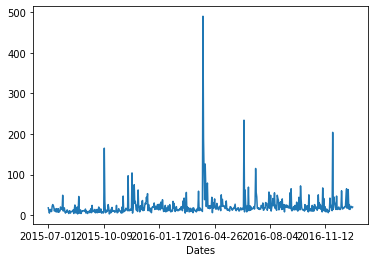

In [9]:
train_1_reduce["2NE1_zh.wikipedia.org_all-access_spider"].plot()

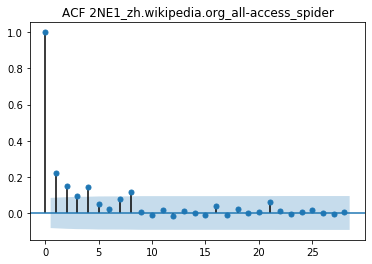

In [10]:
plot_acf(train_1_reduce["2NE1_zh.wikipedia.org_all-access_spider"])
plt.title("ACF 2NE1_zh.wikipedia.org_all-access_spider")
plt.show()

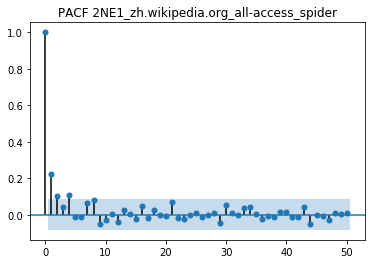

In [11]:
plot_pacf(train_1_reduce["2NE1_zh.wikipedia.org_all-access_spider"], lags=50)
plt.title("PACF 2NE1_zh.wikipedia.org_all-access_spider")
plt.show()

In [12]:
sum_df = train_1_reduce.sum(axis = 1, skipna = True)
sum_df

Dates
2015-07-01    148672476.0
2015-07-02    149593840.0
2015-07-03    141164198.0
2015-07-04    145612937.0
2015-07-05    151495372.0
                 ...     
2016-12-27    237248109.0
2016-12-28    230782936.0
2016-12-29    237886569.0
2016-12-30    207608296.0
2016-12-31    209321794.0
Length: 550, dtype: float64

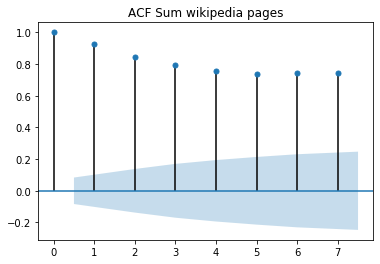

In [13]:
plot_acf(sum_df ,lags = 7)
plt.title("ACF Sum wikipedia pages")
plt.show()

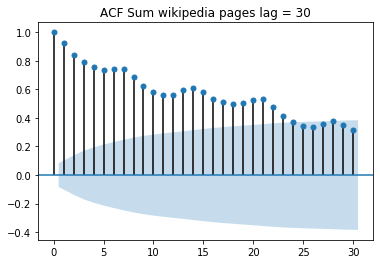

In [14]:
plot_acf(sum_df, lags=30)
plt.title("ACF Sum wikipedia pages lag = 30")
plt.show()

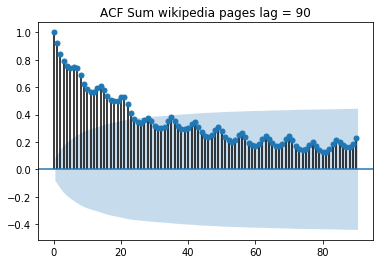

In [15]:
plot_acf(sum_df, lags=90)
plt.title("ACF Sum wikipedia pages lag = 90")
plt.show()

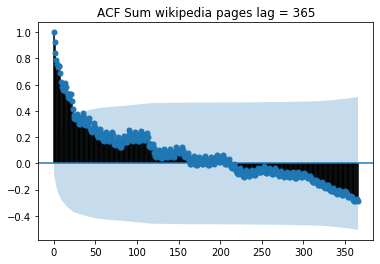

In [16]:
plot_acf(sum_df, lags=365)
plt.title("ACF Sum wikipedia pages lag = 365")
plt.show()

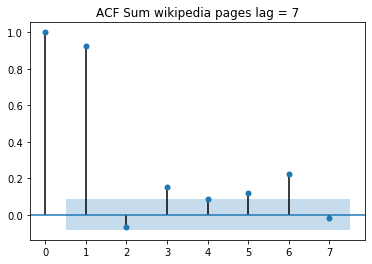

In [17]:
plot_pacf(sum_df, lags=7)
plt.title("ACF Sum wikipedia pages lag = 7")
plt.show()

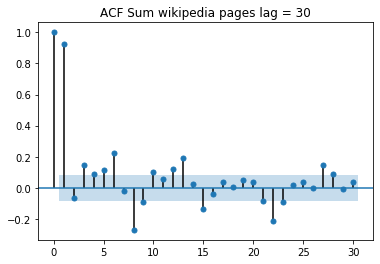

In [18]:
plot_pacf(sum_df, lags=30)
plt.title("ACF Sum wikipedia pages lag = 30")
plt.show()

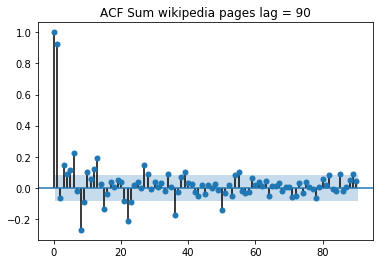

In [19]:
plot_pacf(sum_df, lags=90)
plt.title("ACF Sum wikipedia pages lag = 90")
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


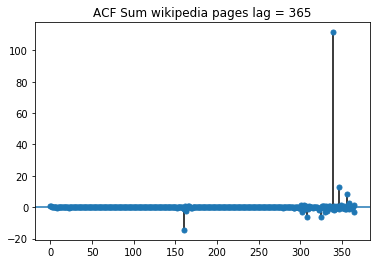

In [20]:
plot_pacf(sum_df, lags=365)
plt.title("ACF Sum wikipedia pages lag = 365")
plt.show()

In [24]:
max(pacf(sum_df,nlags=365))

111.51072483662068

In [27]:
list(pacf(sum_df,nlags=365)).index(max(pacf(sum_df,nlags=365)))

339

In [28]:
list(pacf(sum_df,nlags=365)).index(min(pacf(sum_df,nlags=365)))

161